- all_features2_standard.csv
- all_features2_minmax.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/학교/Dissertation/Features/all_features2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,title,page_id,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,paragraph_count,...,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,review_per_day,review_per_user,discussion_count,revert_count,quality
0,Mayan languages,182013,37370,6527,181,9294,957,12,25,81,...,2533,832,466,366,719,0.324452,3.044471,472,415,1
1,Mu'awiya I,207068,67665,12267,338,16816,1571,14,17,75,...,3947,1377,657,720,1136,0.509159,2.866376,970,721,1
2,The Fountainhead,180464,36772,6647,243,9321,924,11,21,54,...,2318,1104,486,618,971,0.296761,2.099638,218,228,1
3,Northern pintail,218361,13230,2453,66,3181,226,8,2,27,...,763,376,282,94,334,0.098706,2.029255,54,86,1
4,Manhattan Project,19603,101197,18039,582,26102,2908,25,31,148,...,6417,2647,1281,1366,2296,0.766850,2.424254,847,1112,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,1927,323,8,515,65,2,0,7,...,89,53,41,12,46,0.011623,1.679245,12,3,0
5196,Minawara and Multultu,95240,421,83,4,101,6,1,0,1,...,34,29,27,2,29,0.004280,1.172414,3,1,0
5197,Theophylline/ephedra/hydroxyzine,262652,282,54,3,66,4,1,0,1,...,45,34,30,4,32,0.005873,1.323529,3,2,0
5198,"Channel Lake, Illinois",111450,2336,499,15,571,37,3,2,7,...,72,47,44,3,42,0.009087,1.531915,6,0,0


In [ ]:
df['quality'].value_counts()

quality
1    2600
0    2600
Name: count, dtype: int64

In [ ]:
df.columns

Index(['title', 'page_id', 'char_count', 'word_count', 'sentence_count',
       'syllable_count', 'complex_word_count', 'section_count',
       'subsection_count', 'paragraph_count', 'mean_section_size',
       'mean_paragraph_size', 'longest_section_size', 'shortest_section_size',
       'abstract_size', 'abstract_text_ratio', 'citation_count',
       'citation_per_text', 'external_link_count', 'internal_link_count',
       'link_per_text', 'image_count', 'image_per_text', 'infobox',
       'mean_sentence_size', 'largest_sentence_size', 'shortest_sentence_size',
       'question_count', 'exclamation_count', 'pronoun_start_count', 'ARI',
       'CLI', 'FRE', 'FKG', 'GFI', 'LIX', 'SMOG', 'article_age_days',
       'num_edits', 'num_editors', 'num_registered_editors',
       'num_anonymous_editors', 'num_occasional_editors', 'review_per_day',
       'review_per_user', 'discussion_count', 'revert_count', 'quality'],
      dtype='object')

In [ ]:
df.iloc[:, -1]

0       1
1       1
2       1
3       1
4       1
       ..
5195    0
5196    0
5197    0
5198    0
5199    0
Name: quality, Length: 5200, dtype: int64

In [ ]:
df_text = df.iloc[:, list(range(2, 7)) + [-1]]
df_text

,char_count,word_count,sentence_count,syllable_count,complex_word_count,quality
0,37370,6527,181,9294,957,1
1,67665,12267,338,16816,1571,1
2,36772,6647,243,9321,924,1
3,13230,2453,66,3181,226,1
4,101197,18039,582,26102,2908,1
...,...,...,...,...,...,...
5195,1927,323,8,515,65,0
5196,421,83,4,101,6,0
5197,282,54,3,66,4,0
5198,2336,499,15,571,37,0


In [ ]:
df_text = df.iloc[:, list(range(2, 7)) + [-1]]
df_structure = df.iloc[:, list(range(7, 24)) + [-1]]
df_style = df.iloc[:, list(range(24, 30)) + [-1]]
df_readability = df.iloc[:, list(range(30, 37)) + [-1]]
df_review = df.iloc[:, 37:48]

### text features

<Axes: >

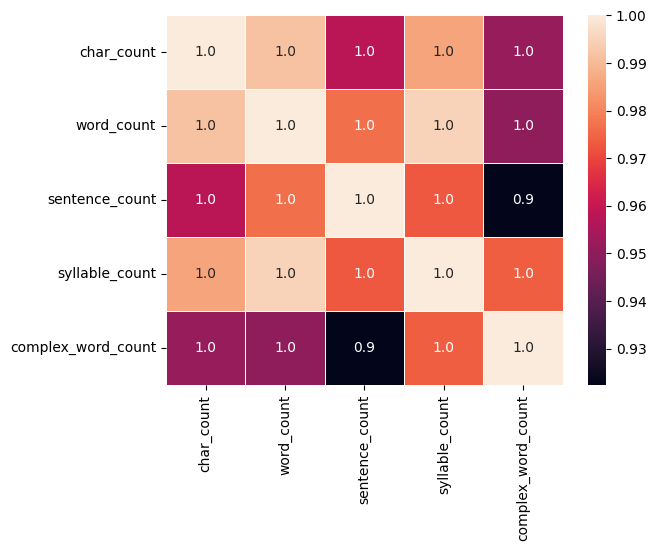

In [ ]:
sns.heatmap(df_text.iloc[:, :5].corr(), annot=True, linewidths=.5, fmt= '.1f')

<Axes: >

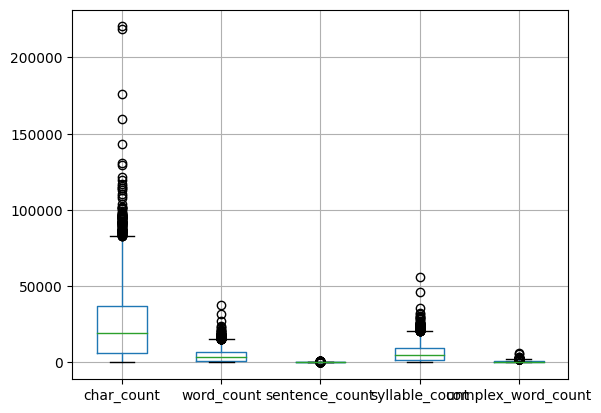

In [ ]:
df_text.iloc[:, :5].boxplot()

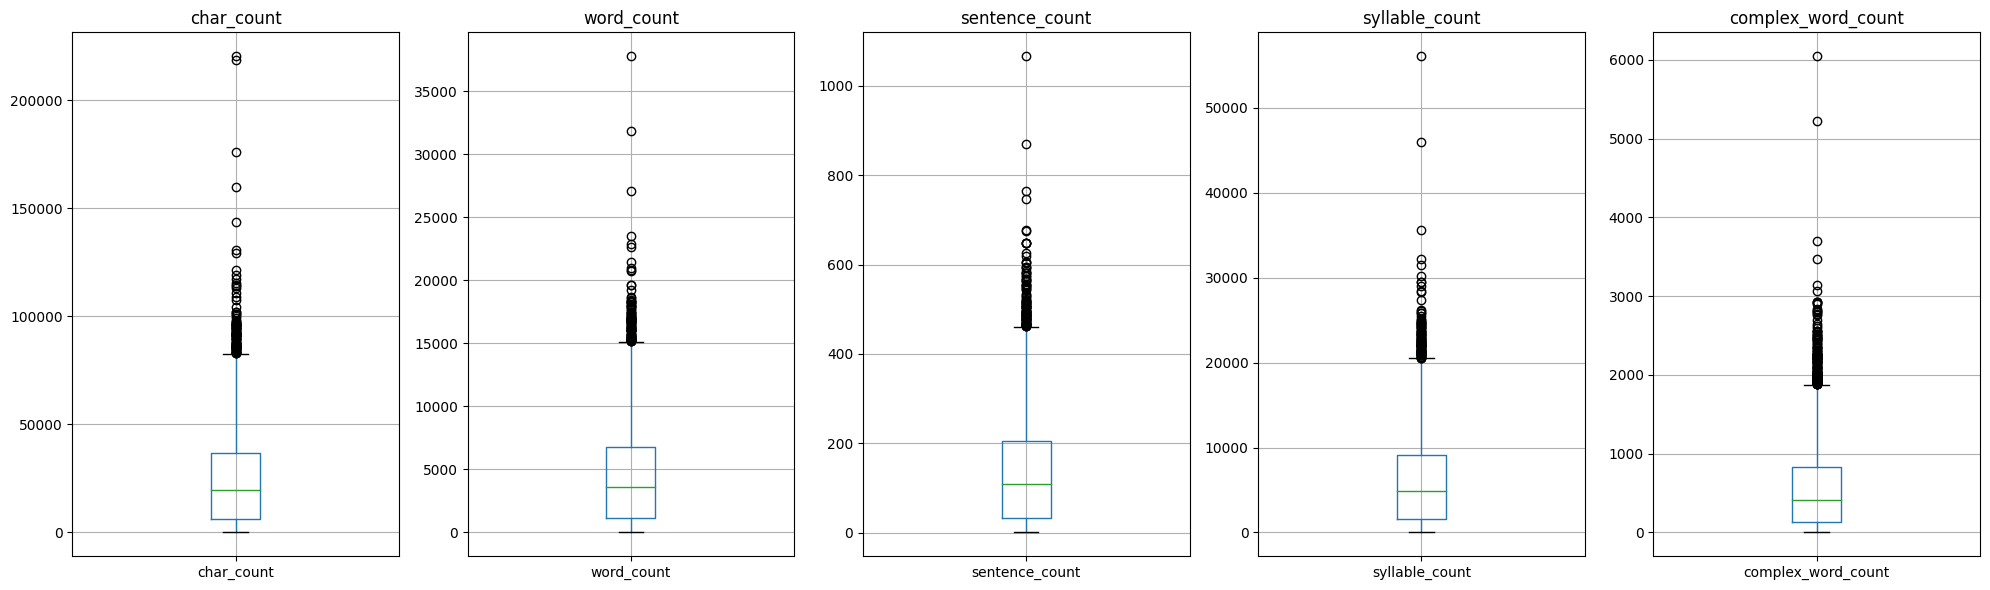

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=False)

for i, column in enumerate(df_text.iloc[:, :5].columns):
    df_text.iloc[:, :5].boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

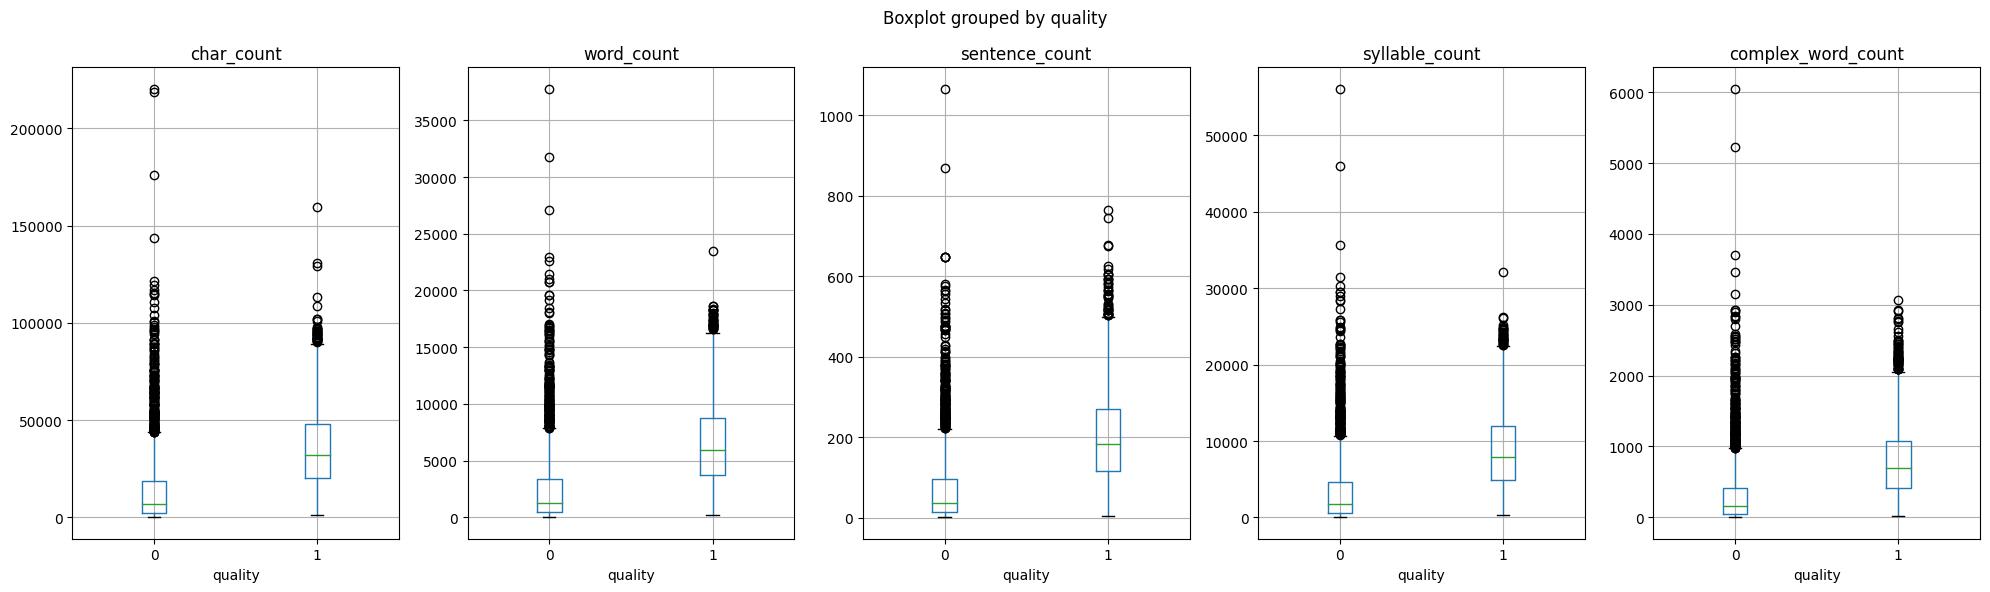

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=False)

for i, column in enumerate(df_text.columns[:-1]):
    df_text.boxplot(column=column, by='quality', ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

### structure features

<Axes: >

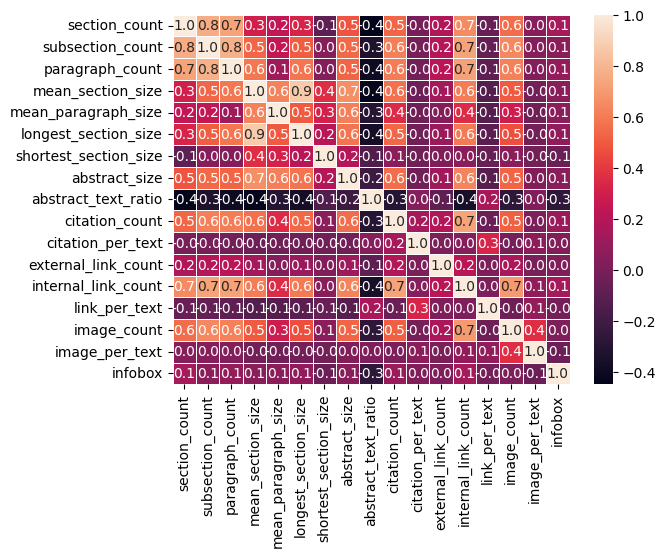

In [ ]:
sns.heatmap(df_structure.iloc[:, :-1].corr(), annot=True, linewidths=.5, fmt= '.1f')

<Axes: >

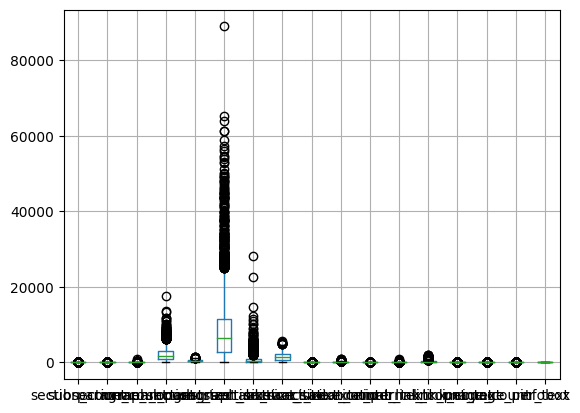

In [ ]:
df_structure.iloc[:, :-1].boxplot()

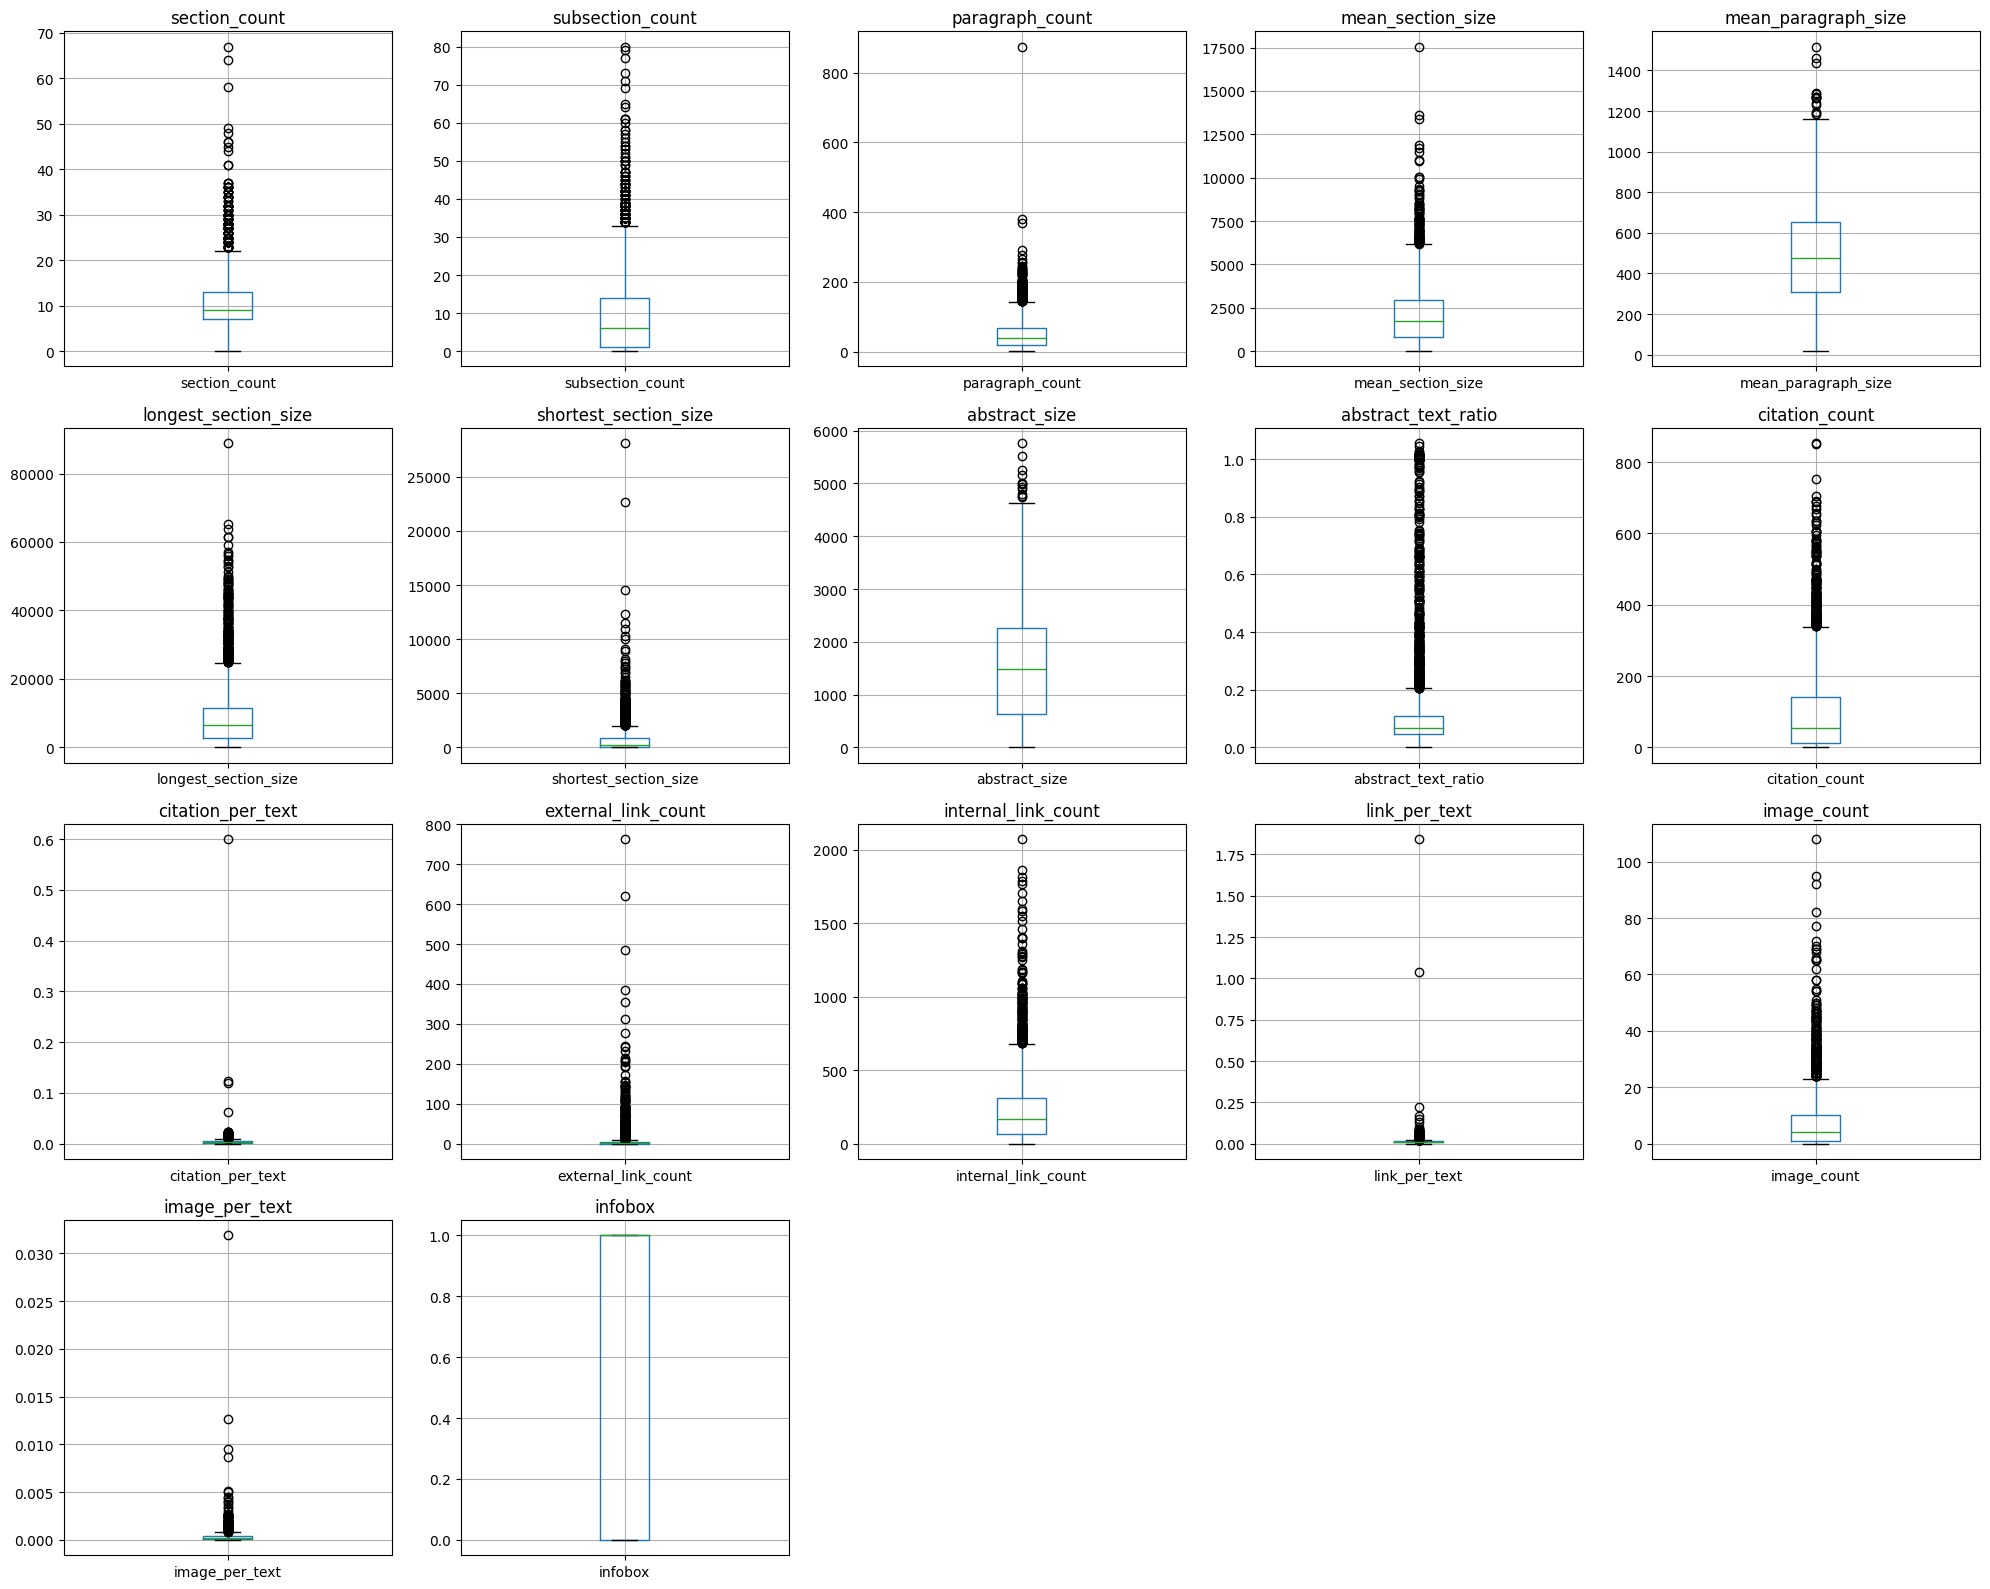

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_structure.iloc[:, :-1].columns):
    df_structure.iloc[:, :-1].boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

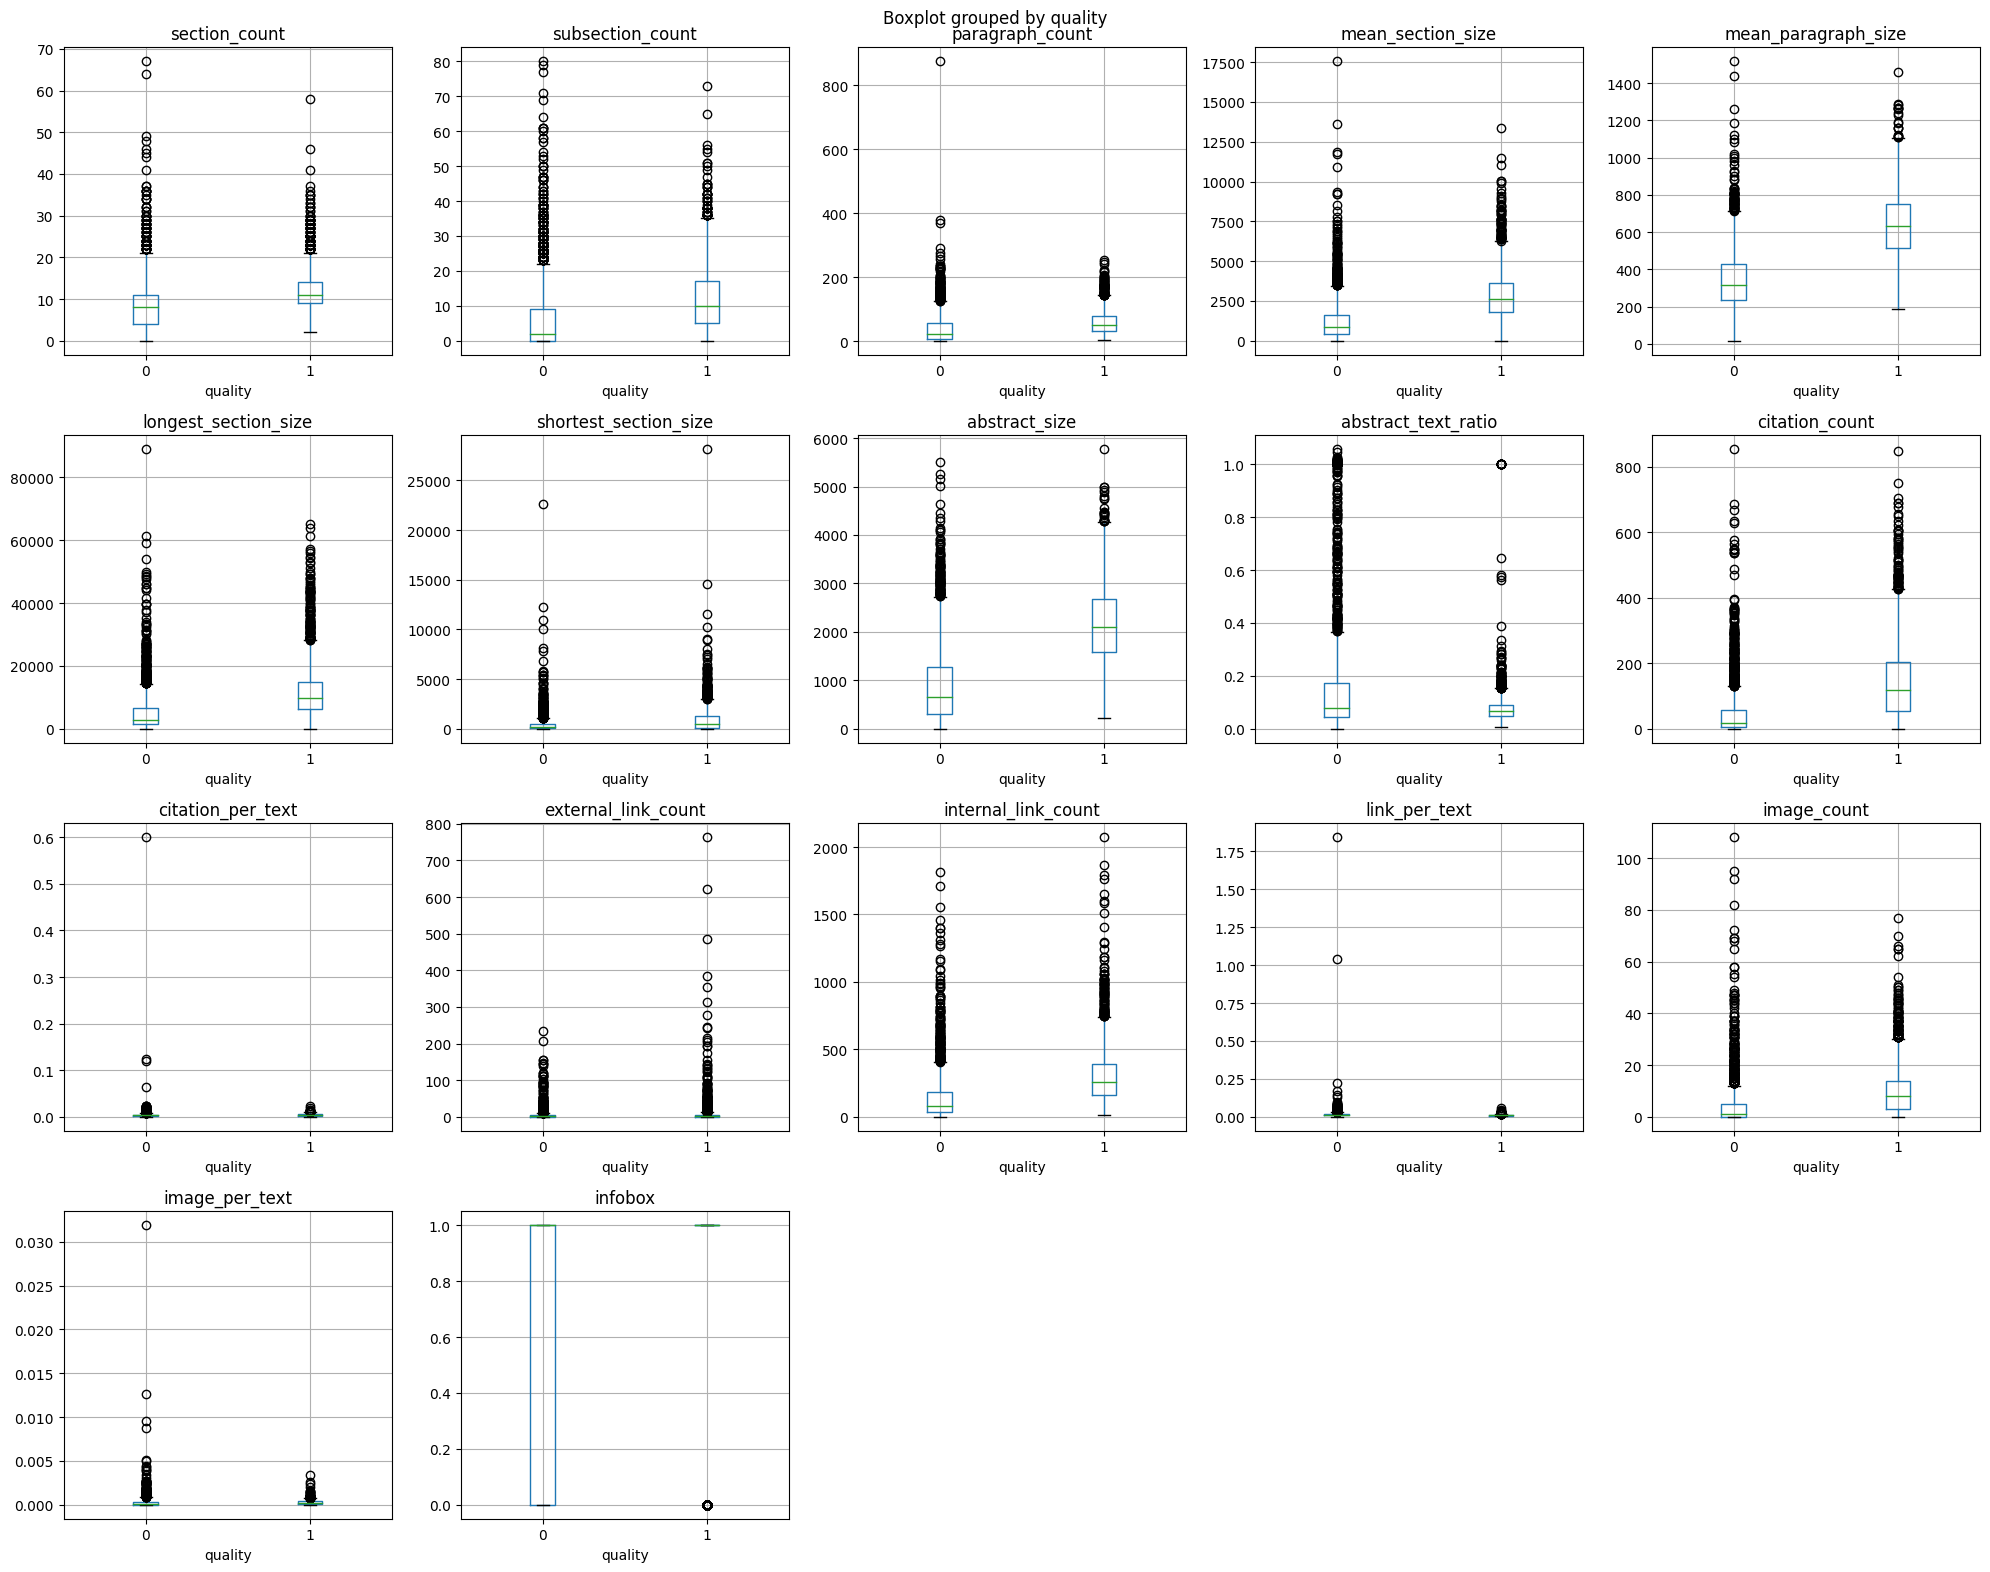

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_structure.columns[:-1]):
    df_structure.boxplot(column=column, by='quality', ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### style features

<Axes: >

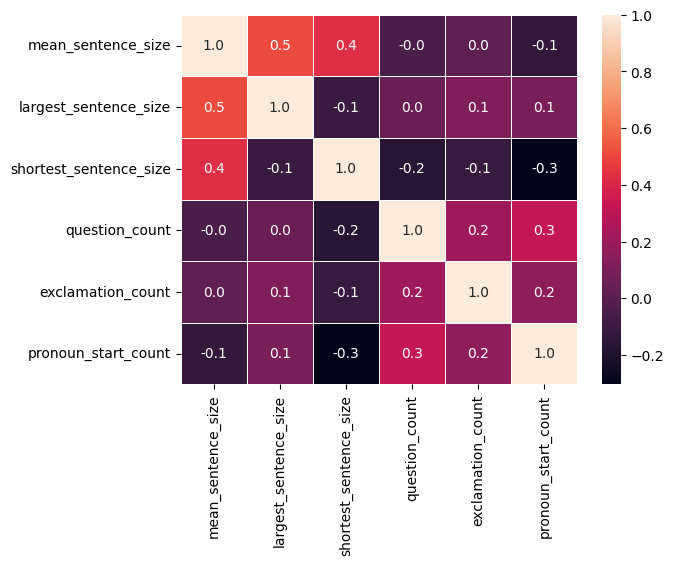

In [ ]:
sns.heatmap(df_style.iloc[:, :-1].corr(), annot=True, linewidths=.5, fmt= '.1f')

<Axes: >

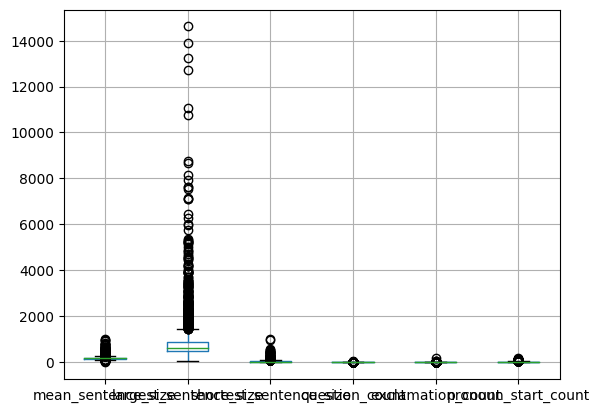

In [ ]:
df_style.iloc[:, :-1].boxplot()

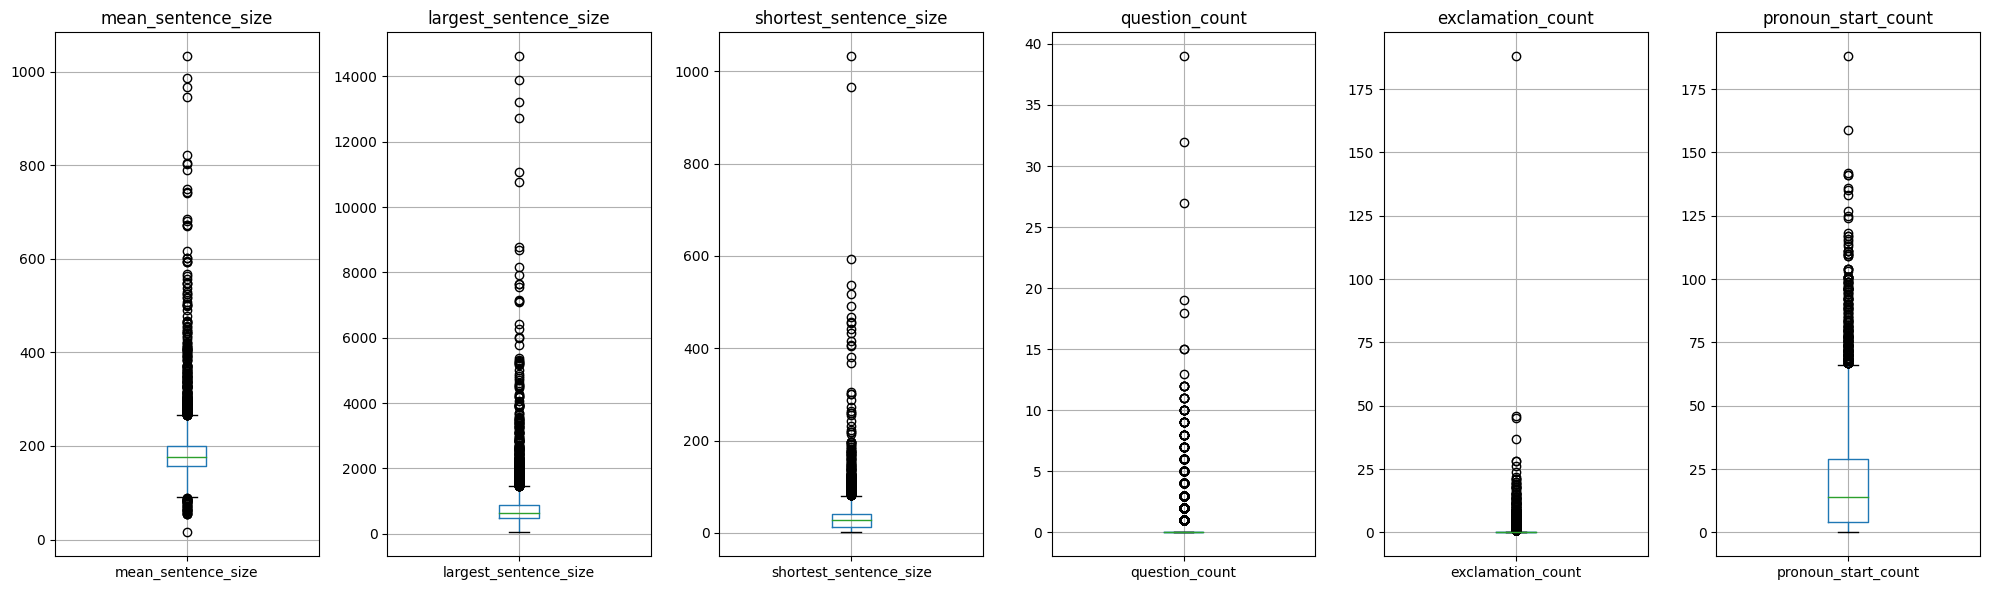

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(20, 6), sharey=False)

for i, column in enumerate(df_style.iloc[:, :-1].columns):
    df_style.iloc[:, :-1].boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

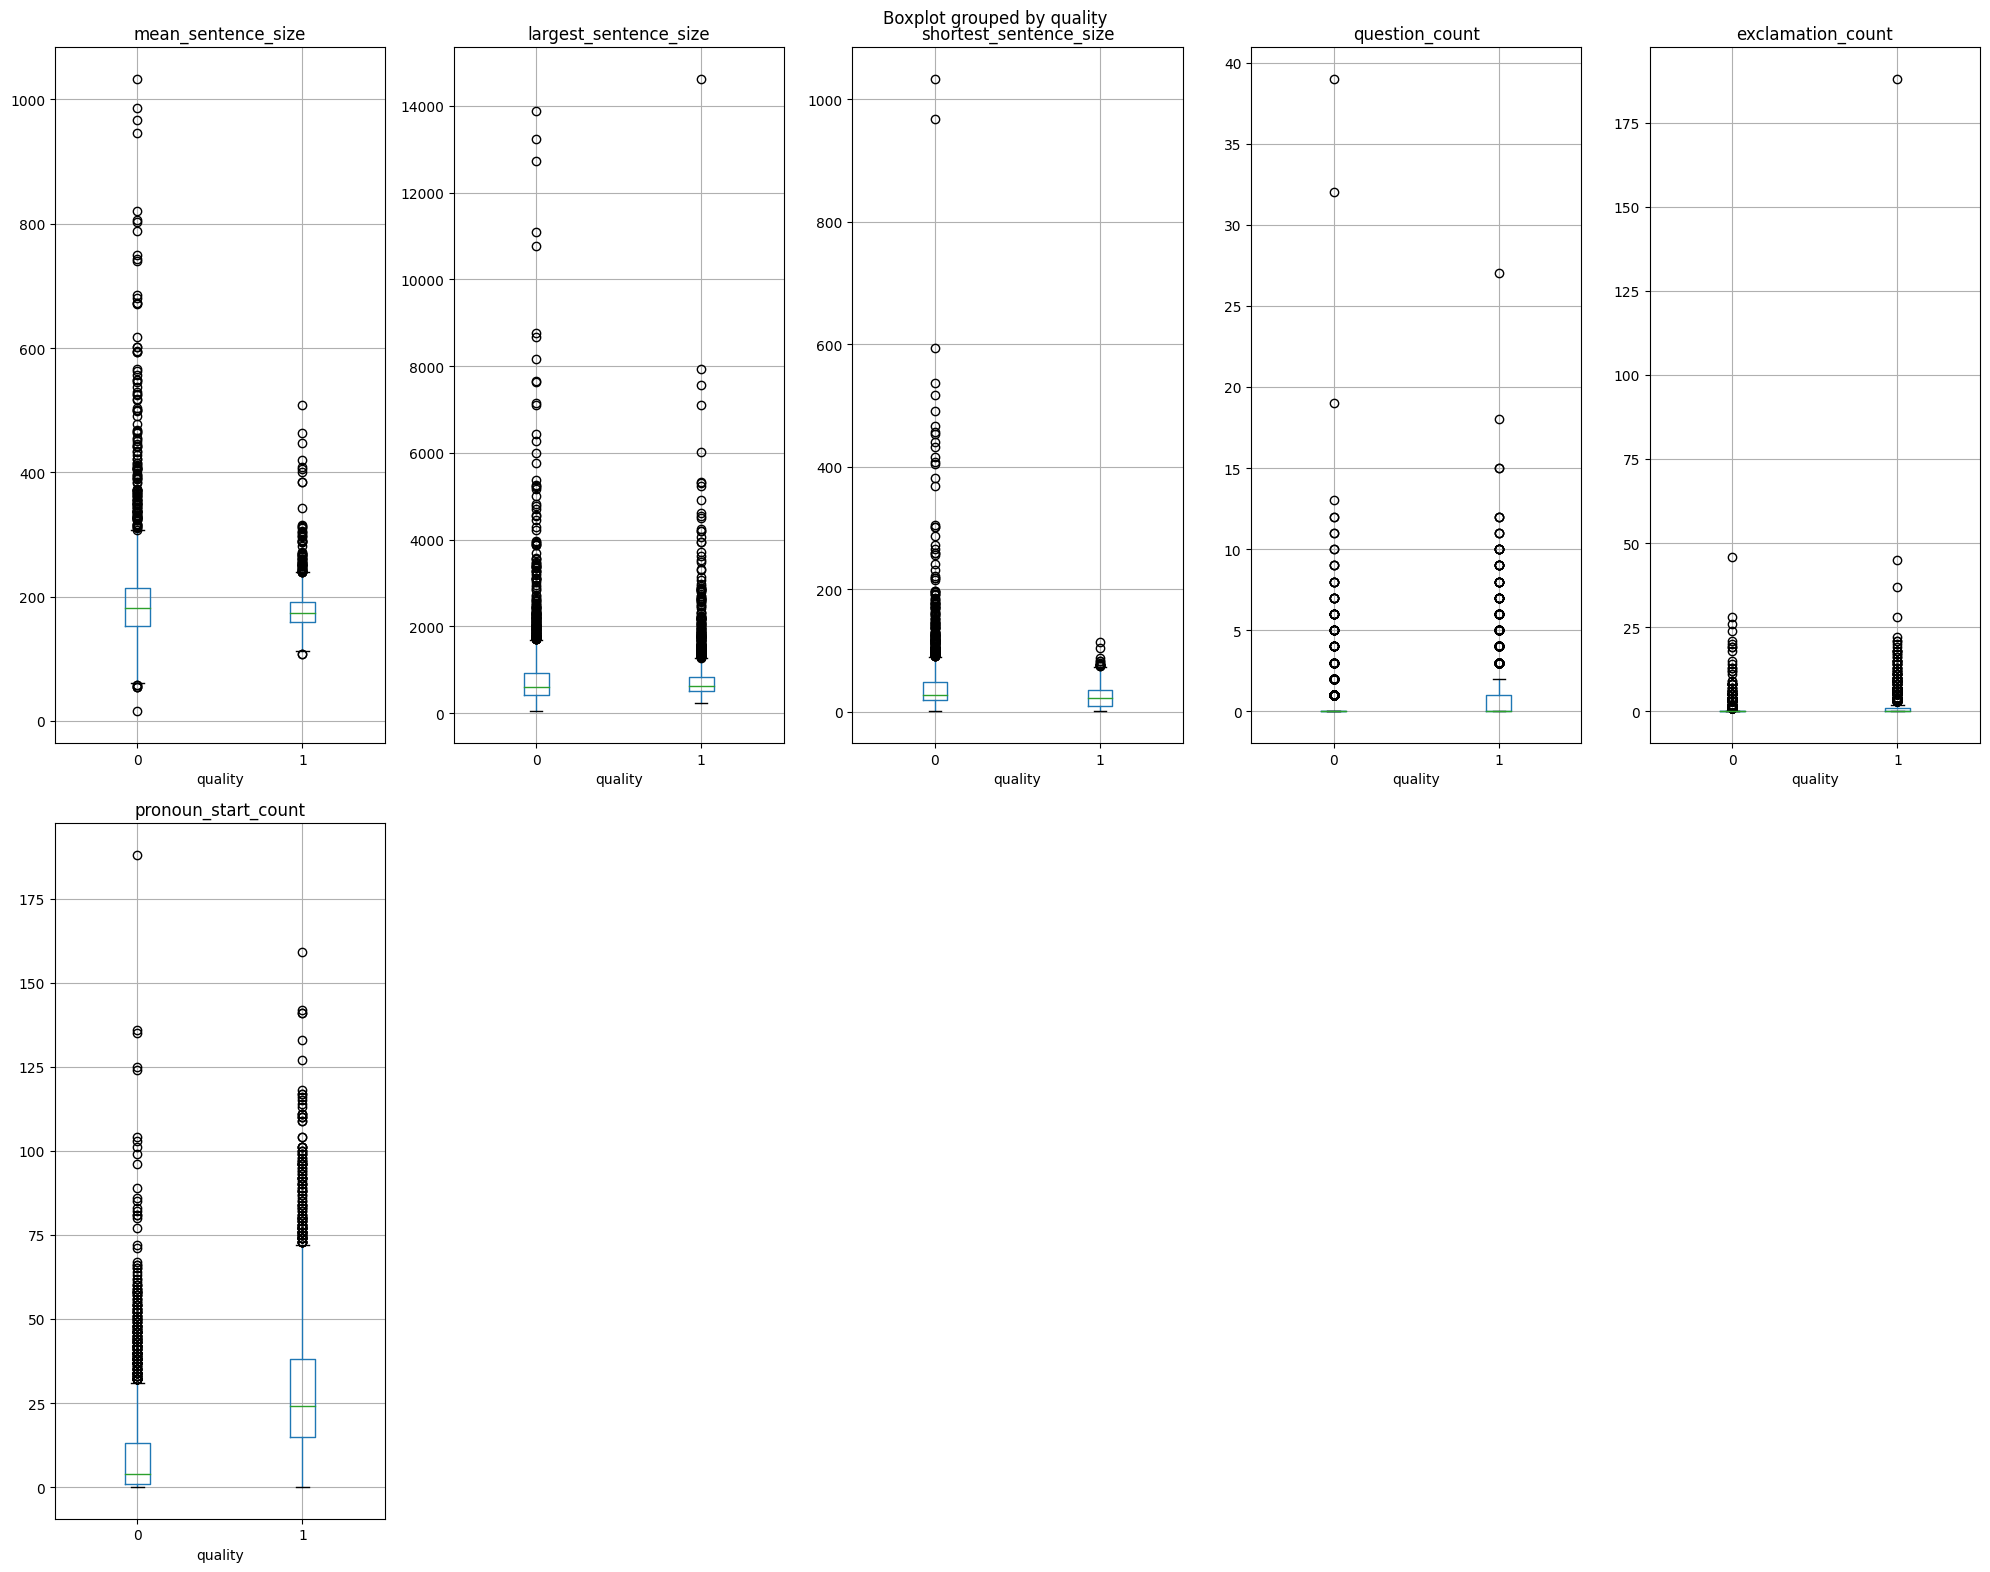

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 16), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_style.columns[:-1]):
    df_style.boxplot(column=column, by='quality', ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### readability features

<Axes: >

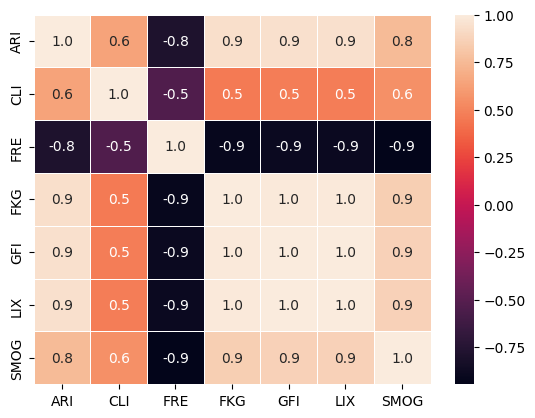

In [ ]:
sns.heatmap(df_readability.iloc[:, :-1].corr(), annot=True, linewidths=.5, fmt= '.1f')

<Axes: >

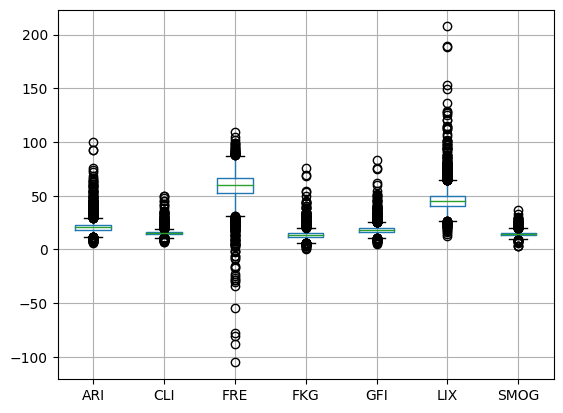

In [ ]:
df_readability.iloc[:, :-1].boxplot()

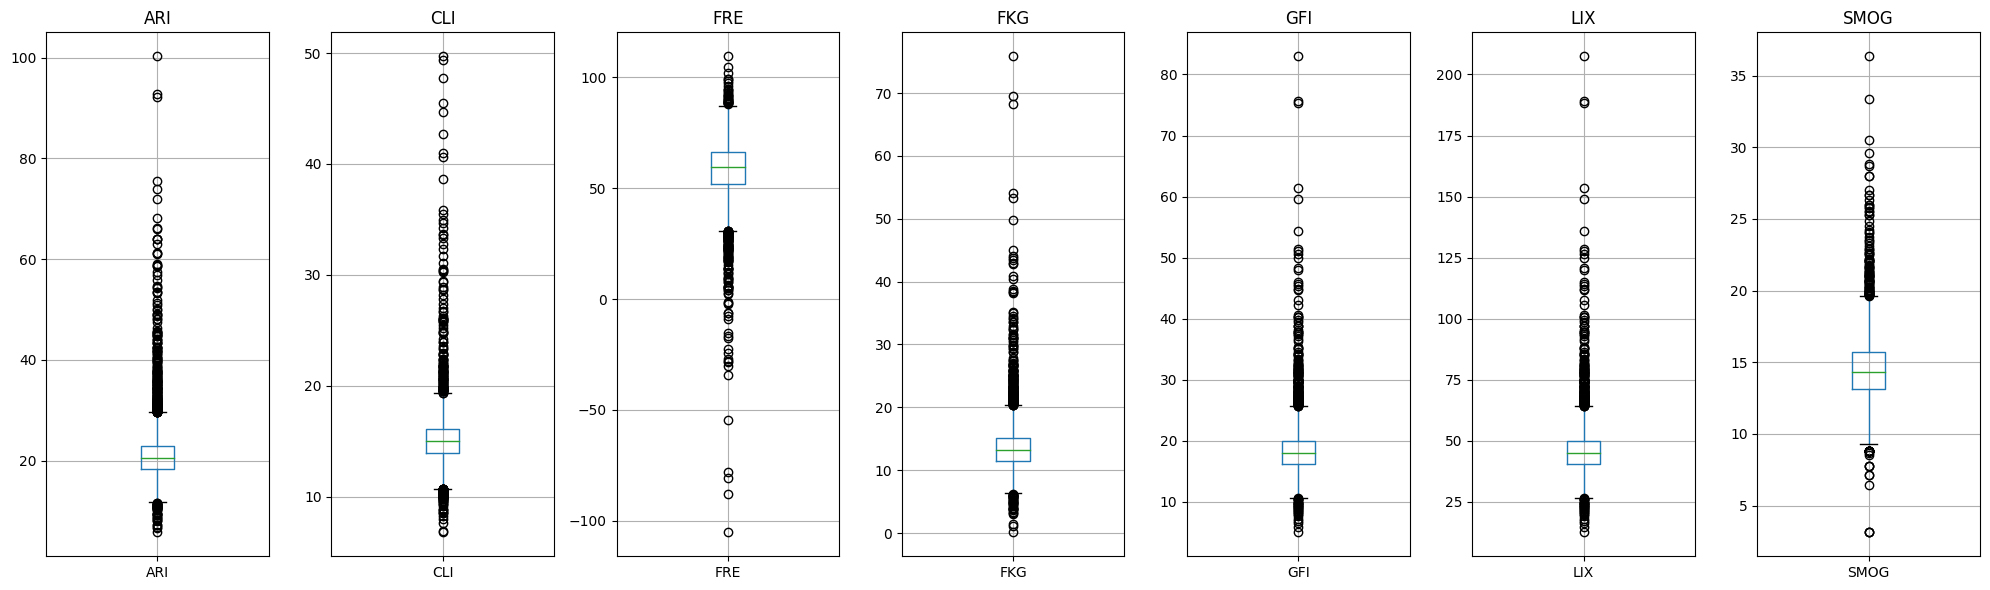

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(20, 6), sharey=False)

for i, column in enumerate(df_readability.iloc[:, :-1].columns):
    df_readability.iloc[:, :-1].boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

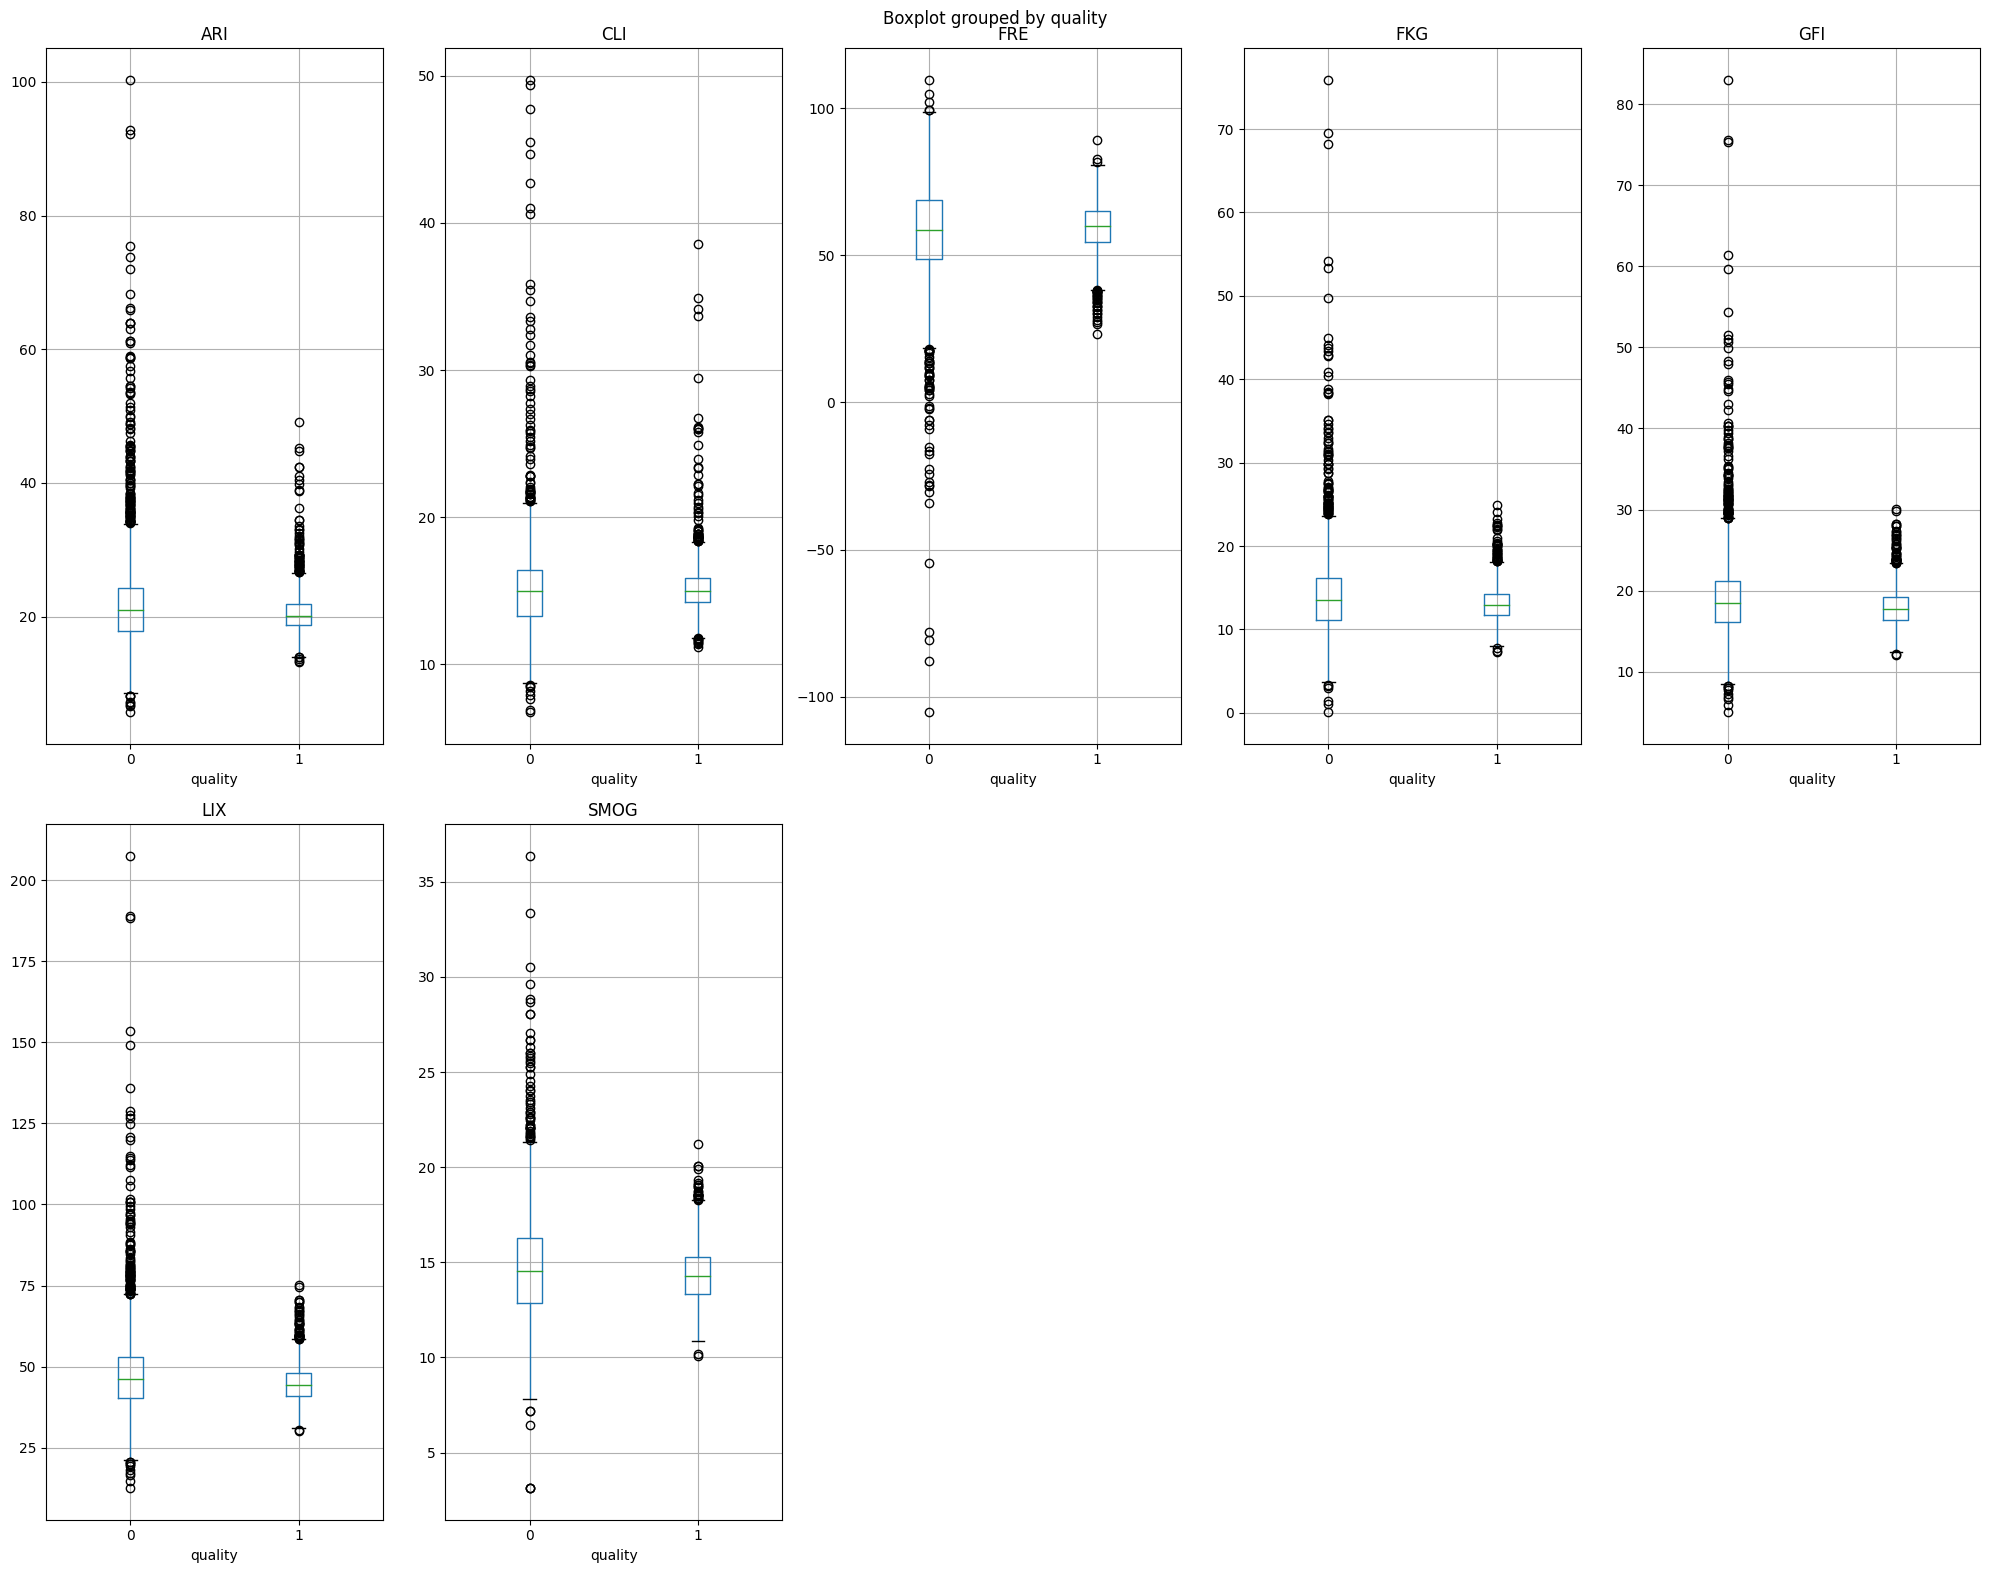

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 16), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_readability.columns[:-1]):
    df_readability.boxplot(column=column, by='quality', ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### review feature

<Axes: >

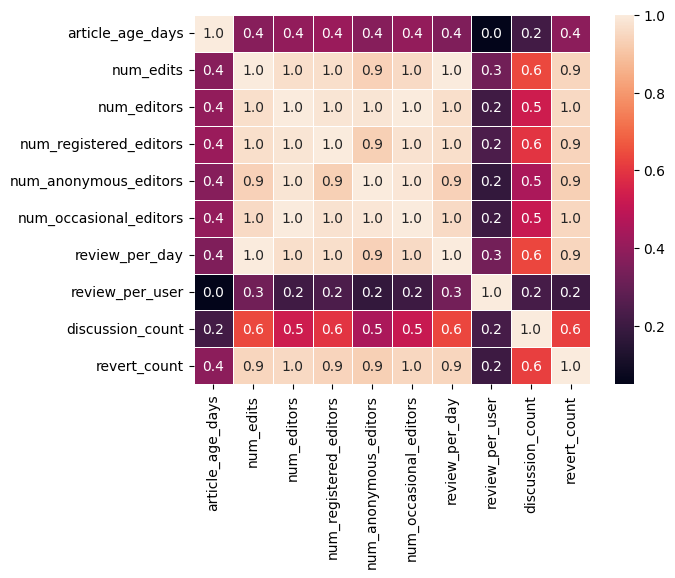

In [ ]:
sns.heatmap(df_review.iloc[:, :-1].corr(), annot=True, linewidths=.5, fmt= '.1f')

<Axes: >

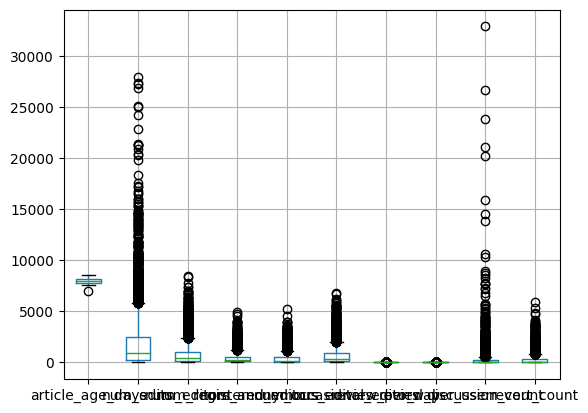

In [ ]:
df_review.iloc[:, :-1].boxplot()

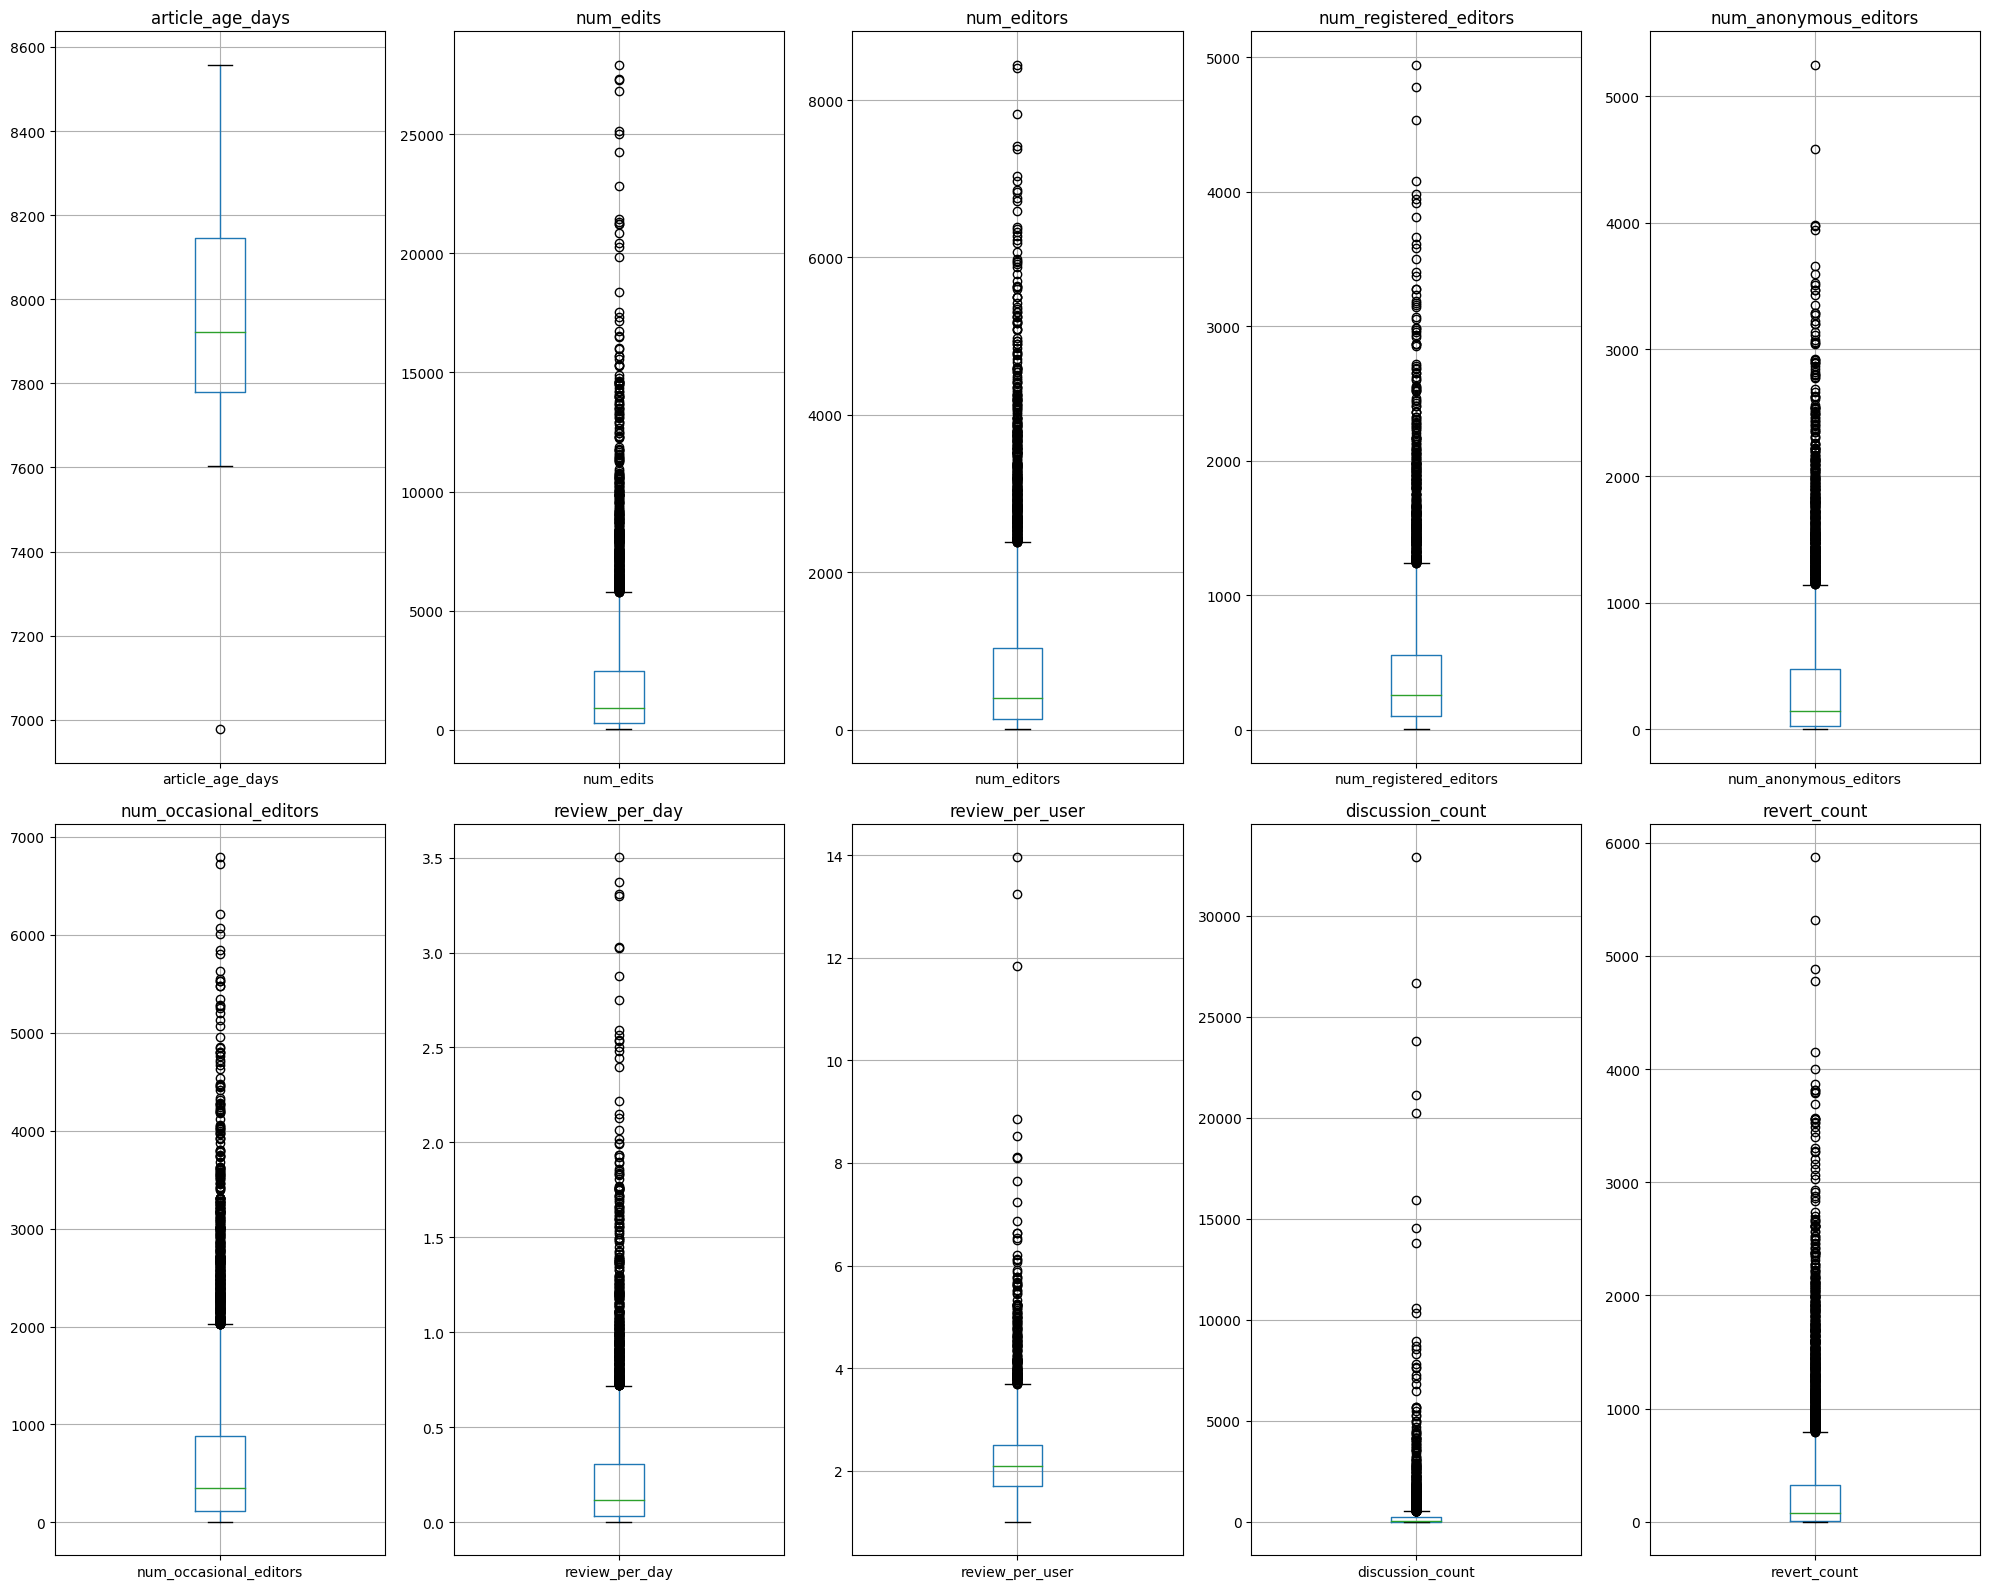

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 16), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_review.iloc[:, :-1].columns):
    df_review.iloc[:, :-1].boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

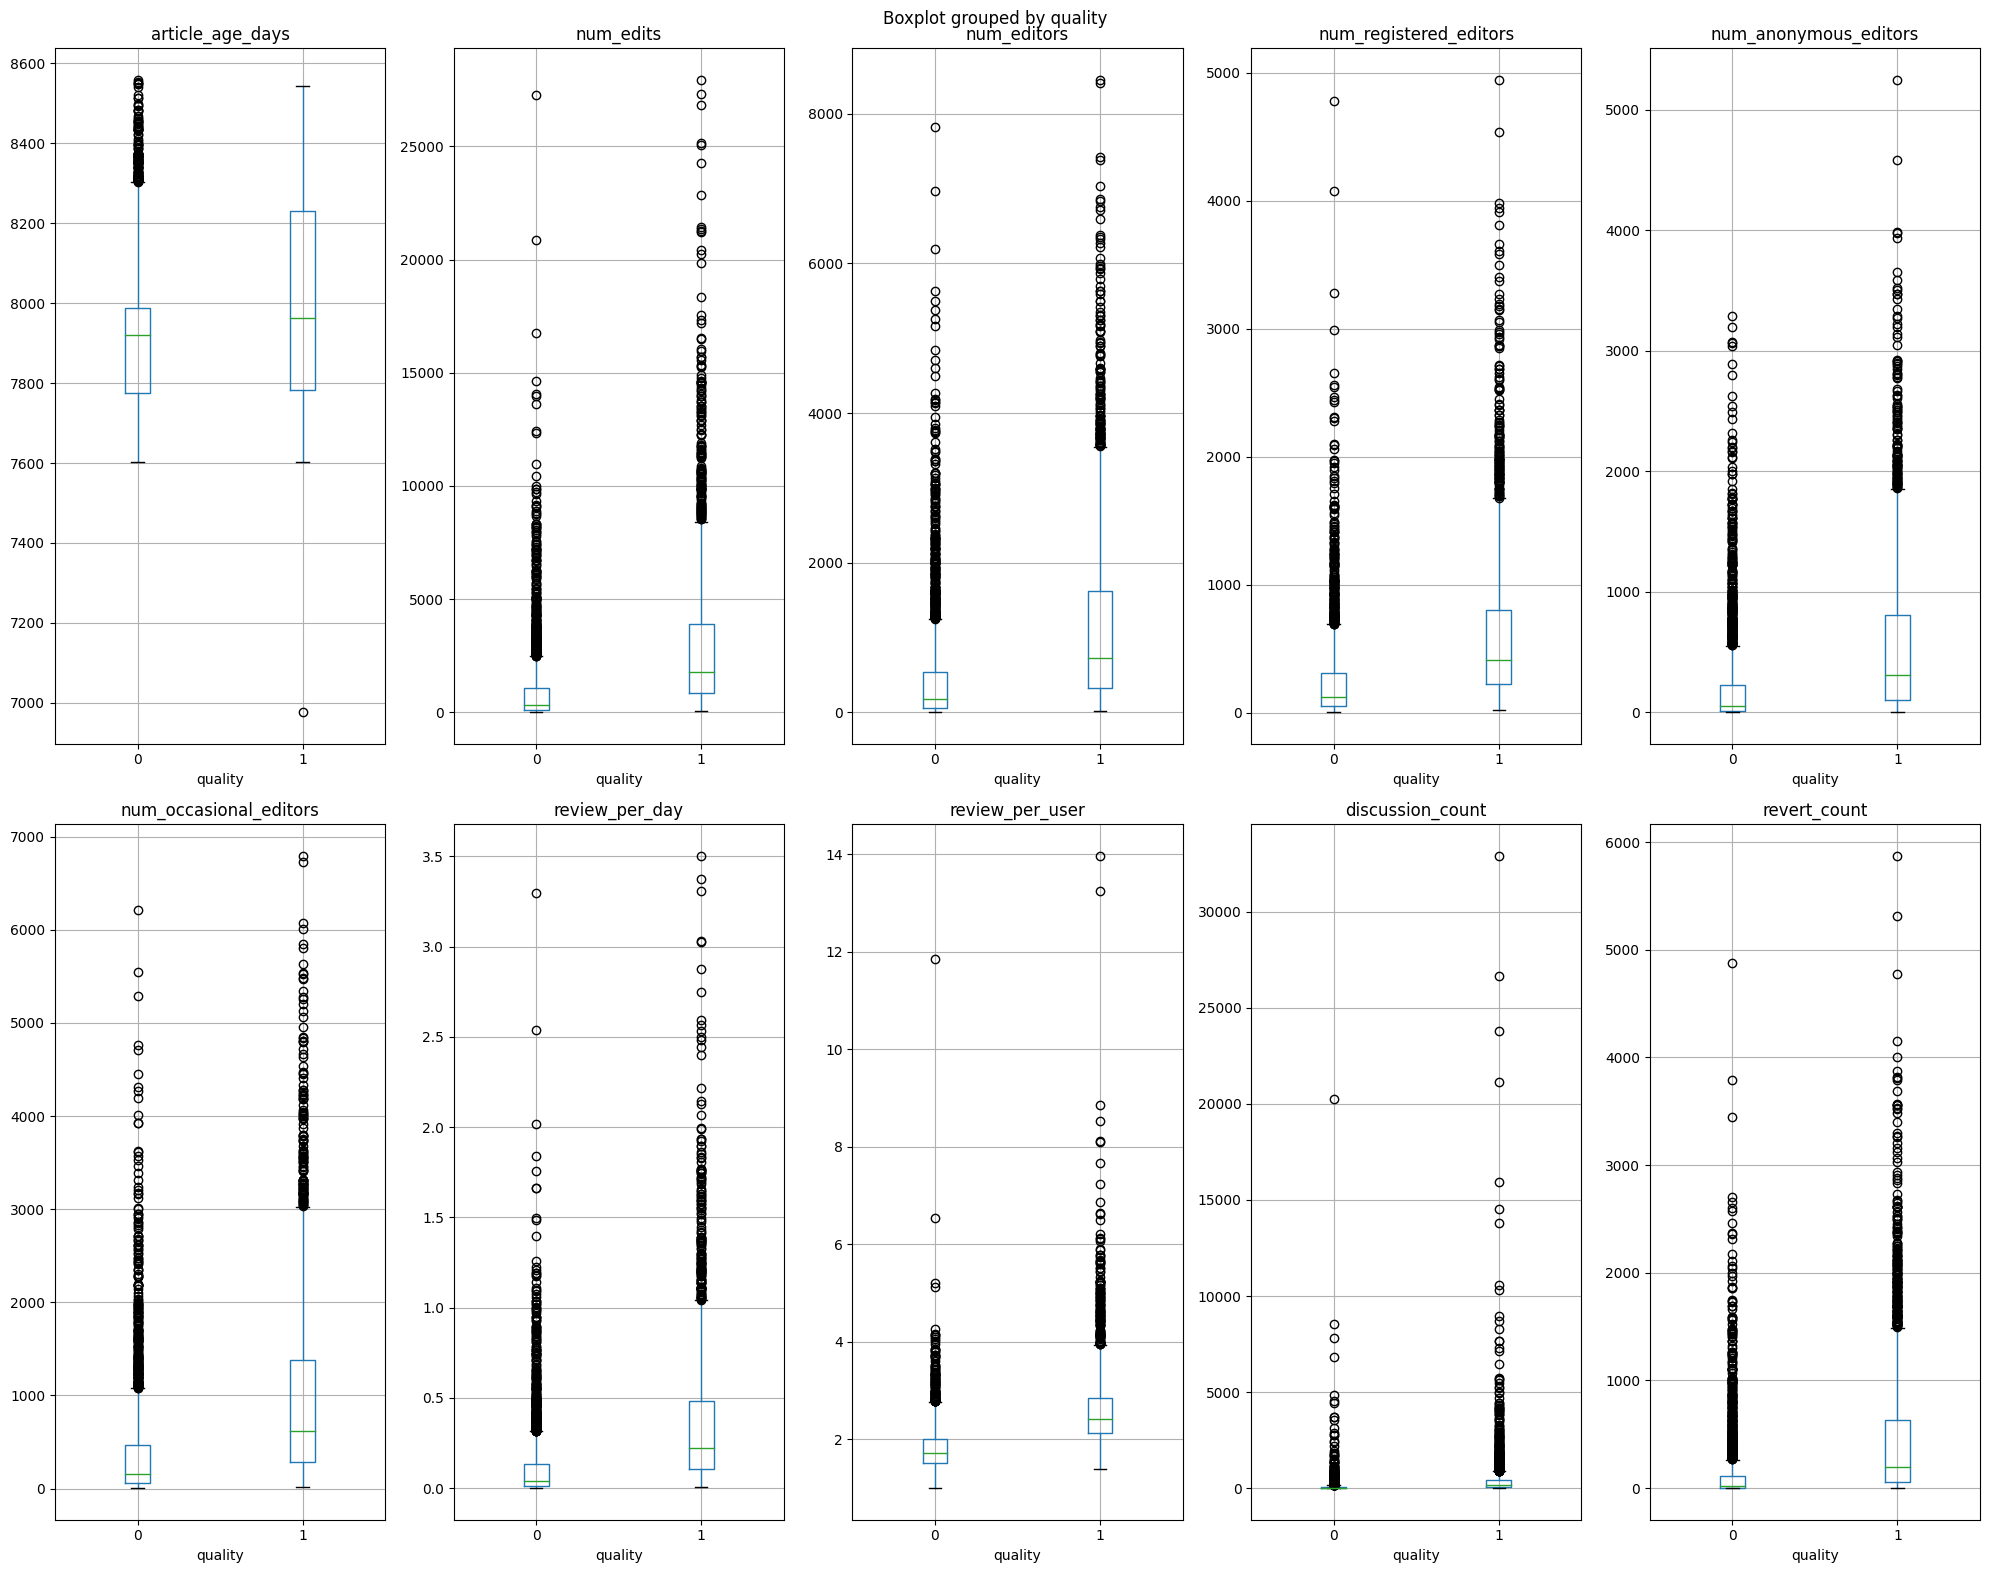

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 16), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_review.columns[:-1]):
    df_review.boxplot(column=column, by='quality', ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Outliers?

### Normalisation

In [3]:
df = pd.read_csv('/content/drive/MyDrive/학교/Dissertation/Features/all_features2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,title,page_id,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,paragraph_count,...,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,review_per_day,review_per_user,discussion_count,revert_count,quality
0,Mayan languages,182013,37370,6527,181,9294,957,12,25,81,...,2533,832,466,366,719,0.324452,3.044471,472,415,1
1,Mu'awiya I,207068,67665,12267,338,16816,1571,14,17,75,...,3947,1377,657,720,1136,0.509159,2.866376,970,721,1
2,The Fountainhead,180464,36772,6647,243,9321,924,11,21,54,...,2318,1104,486,618,971,0.296761,2.099638,218,228,1
3,Northern pintail,218361,13230,2453,66,3181,226,8,2,27,...,763,376,282,94,334,0.098706,2.029255,54,86,1
4,Manhattan Project,19603,101197,18039,582,26102,2908,25,31,148,...,6417,2647,1281,1366,2296,0.766850,2.424254,847,1112,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,1927,323,8,515,65,2,0,7,...,89,53,41,12,46,0.011623,1.679245,12,3,0
5196,Minawara and Multultu,95240,421,83,4,101,6,1,0,1,...,34,29,27,2,29,0.004280,1.172414,3,1,0
5197,Theophylline/ephedra/hydroxyzine,262652,282,54,3,66,4,1,0,1,...,45,34,30,4,32,0.005873,1.323529,3,2,0
5198,"Channel Lake, Illinois",111450,2336,499,15,571,37,3,2,7,...,72,47,44,3,42,0.009087,1.531915,6,0,0


In [6]:
df.columns

Index(['title', 'page_id', 'char_count', 'word_count', 'sentence_count',
       'syllable_count', 'complex_word_count', 'section_count',
       'subsection_count', 'paragraph_count', 'mean_section_size',
       'mean_paragraph_size', 'longest_section_size', 'shortest_section_size',
       'abstract_size', 'abstract_text_ratio', 'citation_count',
       'citation_per_text', 'external_link_count', 'internal_link_count',
       'link_per_text', 'image_count', 'image_per_text', 'infobox',
       'mean_sentence_size', 'largest_sentence_size', 'shortest_sentence_size',
       'question_count', 'exclamation_count', 'pronoun_start_count', 'ARI',
       'CLI', 'FRE', 'FKG', 'GFI', 'LIX', 'SMOG', 'article_age_days',
       'num_edits', 'num_editors', 'num_registered_editors',
       'num_anonymous_editors', 'num_occasional_editors', 'review_per_day',
       'review_per_user', 'discussion_count', 'revert_count', 'quality'],
      dtype='object')

In [7]:
normal_features = df.columns
exclude_features = ['title', 'page_id', 'infobox', 'quality']
normal_features = normal_features.difference(exclude_features)

In [9]:
scaler1 = StandardScaler()

In [12]:
df_normalised1 = df.copy()
df_normalised1[normal_features] = scaler1.fit_transform(df[normal_features])

In [13]:
df_normalised1

,title,page_id,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,paragraph_count,...,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,review_per_day,review_per_user,discussion_count,revert_count,quality
0,Mayan languages,182013,0.554382,0.490641,0.350556,0.563203,0.727204,0.313583,1.614782,0.765594,...,0.202138,0.020507,0.065268,-0.021923,0.032017,0.236123,1.059491,0.171081,0.210672,1
1,Mu'awiya I,207068,1.902108,1.915008,1.614977,1.920173,1.860678,0.660305,0.804225,0.622956,...,0.706190,0.543133,0.438547,0.622440,0.507665,0.775288,0.832776,0.635288,0.779877,1
2,The Fountainhead,180464,0.527779,0.520419,0.849882,0.568074,0.666285,0.140222,1.209503,0.123721,...,0.125496,0.281341,0.104355,0.436776,0.319459,0.155290,-0.143283,-0.065684,-0.137176,1
3,Northern pintail,218361,-0.519528,-0.520312,-0.575612,-0.539584,-0.622258,-0.379860,-0.715570,-0.518153,...,-0.428819,-0.416772,-0.294330,-0.517026,-0.407130,-0.422839,-0.232880,-0.218555,-0.401317,1
4,Manhattan Project,19603,3.393837,3.347316,3.580064,3.595369,4.328846,2.567274,2.222700,2.358391,...,1.586678,1.760994,1.658053,1.798311,1.830809,1.527498,0.269954,0.520634,1.507195,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,-1.022361,-1.048866,-1.042723,-1.020531,-0.919472,-1.420025,-0.918209,-0.993615,...,-0.669082,-0.726511,-0.765325,-0.666285,-0.735635,-0.677037,-0.678444,-0.257705,-0.555709,0
5196,Minawara and Multultu,95240,-1.089358,-1.108422,-1.074937,-1.095216,-1.028389,-1.593386,-0.918209,-1.136253,...,-0.688688,-0.749526,-0.792686,-0.684488,-0.755026,-0.698471,-1.323641,-0.266094,-0.559429,0
5197,Theophylline/ephedra/hydroxyzine,262652,-1.095542,-1.115618,-1.082991,-1.101530,-1.032081,-1.593386,-0.918209,-1.136253,...,-0.684766,-0.744731,-0.786822,-0.680847,-0.751604,-0.693822,-1.131271,-0.266094,-0.557569,0
5198,"Channel Lake, Illinois",111450,-1.004166,-1.005192,-0.986347,-1.010428,-0.971161,-1.246665,-0.715570,-0.993615,...,-0.675142,-0.732265,-0.759462,-0.682668,-0.740197,-0.684439,-0.865996,-0.263298,-0.561290,0


In [16]:
scaler2 = MinMaxScaler()

In [17]:
df_normalised2 = df.copy()
df_normalised2[normal_features] = scaler2.fit_transform(df[normal_features])

In [18]:
df_normalised2

,title,page_id,char_count,word_count,sentence_count,syllable_count,complex_word_count,section_count,subsection_count,paragraph_count,...,num_edits,num_editors,num_registered_editors,num_anonymous_editors,num_occasional_editors,review_per_day,review_per_user,discussion_count,revert_count,quality
0,Mayan languages,182013,0.169354,0.172497,0.169014,0.165418,0.158208,0.179104,0.3125,0.091533,...,0.090476,0.097928,0.093522,0.069728,0.105186,0.092429,0.157678,0.014284,0.070674,1
1,Mu'awiya I,207068,0.306893,0.324498,0.316432,0.299572,0.259712,0.208955,0.2125,0.084668,...,0.141103,0.162463,0.132186,0.137169,0.166618,0.145170,0.143943,0.029418,0.122786,1
2,The Fountainhead,180464,0.166639,0.175675,0.227230,0.165900,0.152753,0.164179,0.2625,0.060641,...,0.082778,0.130136,0.097571,0.117737,0.142310,0.084522,0.084809,0.006564,0.038828,1
3,Northern pintail,218361,0.059760,0.064614,0.061033,0.056394,0.037362,0.119403,0.0250,0.029748,...,0.027103,0.043931,0.056275,0.017908,0.048468,0.027969,0.079380,0.001580,0.014646,1
4,Manhattan Project,19603,0.459127,0.477346,0.545540,0.465186,0.480741,0.373134,0.3875,0.168192,...,0.229538,0.312848,0.258502,0.260240,0.337507,0.218752,0.109844,0.025680,0.189373,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,Party of Democratic Kampuchea,265468,0.008444,0.008209,0.006573,0.008846,0.010746,0.029851,0.0000,0.006865,...,0.002972,0.005684,0.007490,0.002286,0.006040,0.003103,0.052386,0.000304,0.000511,0
5196,Minawara and Multultu,95240,0.001607,0.001854,0.002817,0.001462,0.000992,0.014925,0.0000,0.000000,...,0.001003,0.002842,0.004656,0.000381,0.003536,0.001007,0.013297,0.000030,0.000170,0
5197,Theophylline/ephedra/hydroxyzine,262652,0.000976,0.001086,0.001878,0.000838,0.000661,0.014925,0.0000,0.000000,...,0.001396,0.003434,0.005263,0.000762,0.003978,0.001461,0.024952,0.000030,0.000341,0
5198,"Channel Lake, Illinois",111450,0.010301,0.012870,0.013146,0.009845,0.006117,0.044776,0.0250,0.006865,...,0.002363,0.004973,0.008097,0.000572,0.005451,0.002379,0.041024,0.000122,0.000000,0


In [19]:
df_normalised1.to_csv('/content/drive/MyDrive/학교/Dissertation/Data Preprocessing/all_features2_standard.csv')
df_normalised2.to_csv('/content/drive/MyDrive/학교/Dissertation/Data Preprocessing/all_features2_minmax.csv')